### 1. Importing Libraries


In [10]:
import os
import pandas as pd  
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

import eda_helper_functions

In [3]:
### 2. Reading train data
df = pd.read_csv('../data/train.csv')
df.shape

(498, 8)

In [4]:
df.head()

,pclass,sex,age,sibsp,parch,fare,embarked,survived
0,1,female,24.0,0,0,69.3000,C,1
1,3,female,3.0,3,1,21.0750,S,0
2,3,female,16.0,0,0,7.7333,Q,1
3,3,male,32.0,0,0,56.4958,S,1
4,3,male,22.0,0,0,7.1250,S,0


### 2. High Level Summary of Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 498 entries, 0 to 497
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   pclass    498 non-null    int64  
 1   sex       498 non-null    object 
 2   age       402 non-null    float64
 3   sibsp     498 non-null    int64  
 4   parch     498 non-null    int64  
 5   fare      498 non-null    float64
 6   embarked  497 non-null    object 
 7   survived  498 non-null    int64  
dtypes: float64(2), int64(4), object(2)
memory usage: 31.3+ KB


In [6]:
df.describe()

,pclass,age,sibsp,parch,fare,survived
count,498.000000,402.000000,498.000000,498.000000,498.000000,498.000000
mean,2.339357,29.309701,0.578313,0.381526,30.335199,0.379518
std,0.816885,14.646028,1.229619,0.799283,44.541796,0.485755
min,1.000000,0.670000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.000000,0.000000,0.000000,7.925000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.254150,0.000000
75%,3.000000,38.000000,1.000000,0.000000,30.053100,1.000000
max,3.000000,80.000000,8.000000,5.000000,512.329200,1.000000


none of the values r negative, so all look like valid values

In [8]:
df.describe(include='O')

,sex,embarked
count,498,497
unique,2,3
top,male,S
freq,333,373


`sex` and `embarked` are both imbalanced colms 

In [9]:
(
 df
 .assign(survived=df.survived.astype(object))
 .describe(include='O') 
)

,sex,embarked,survived
count,498,497,498
unique,2,3,2
top,male,S,0
freq,333,373,309


Observations
 1. dfadfa
 2. `sex` and `embarked` are both imbalanced colms 

### 3. High level analysis of missing values in our dataset

In [17]:
df.isnull().sum()

pclass       0
sex          0
age         96
sibsp        0
parch        0
fare         0
embarked     1
survived     0
dtype: int64

In [11]:
eda_helper_functions.missing_info(df)

,count,percentage
variable,,
age,96,19.277108
embarked,1,0.200803


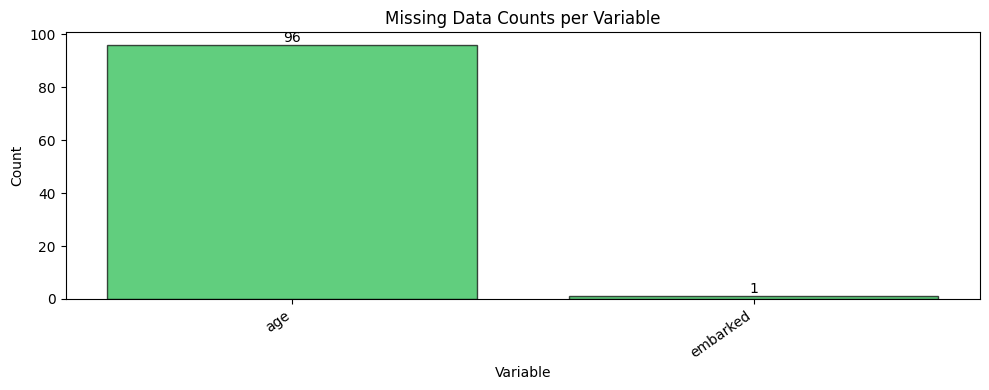

In [15]:
eda_helper_functions.plot_missing_info(df)

`age` and `embarked` have missing values

In [18]:
import missingno as msno


<Axes: >

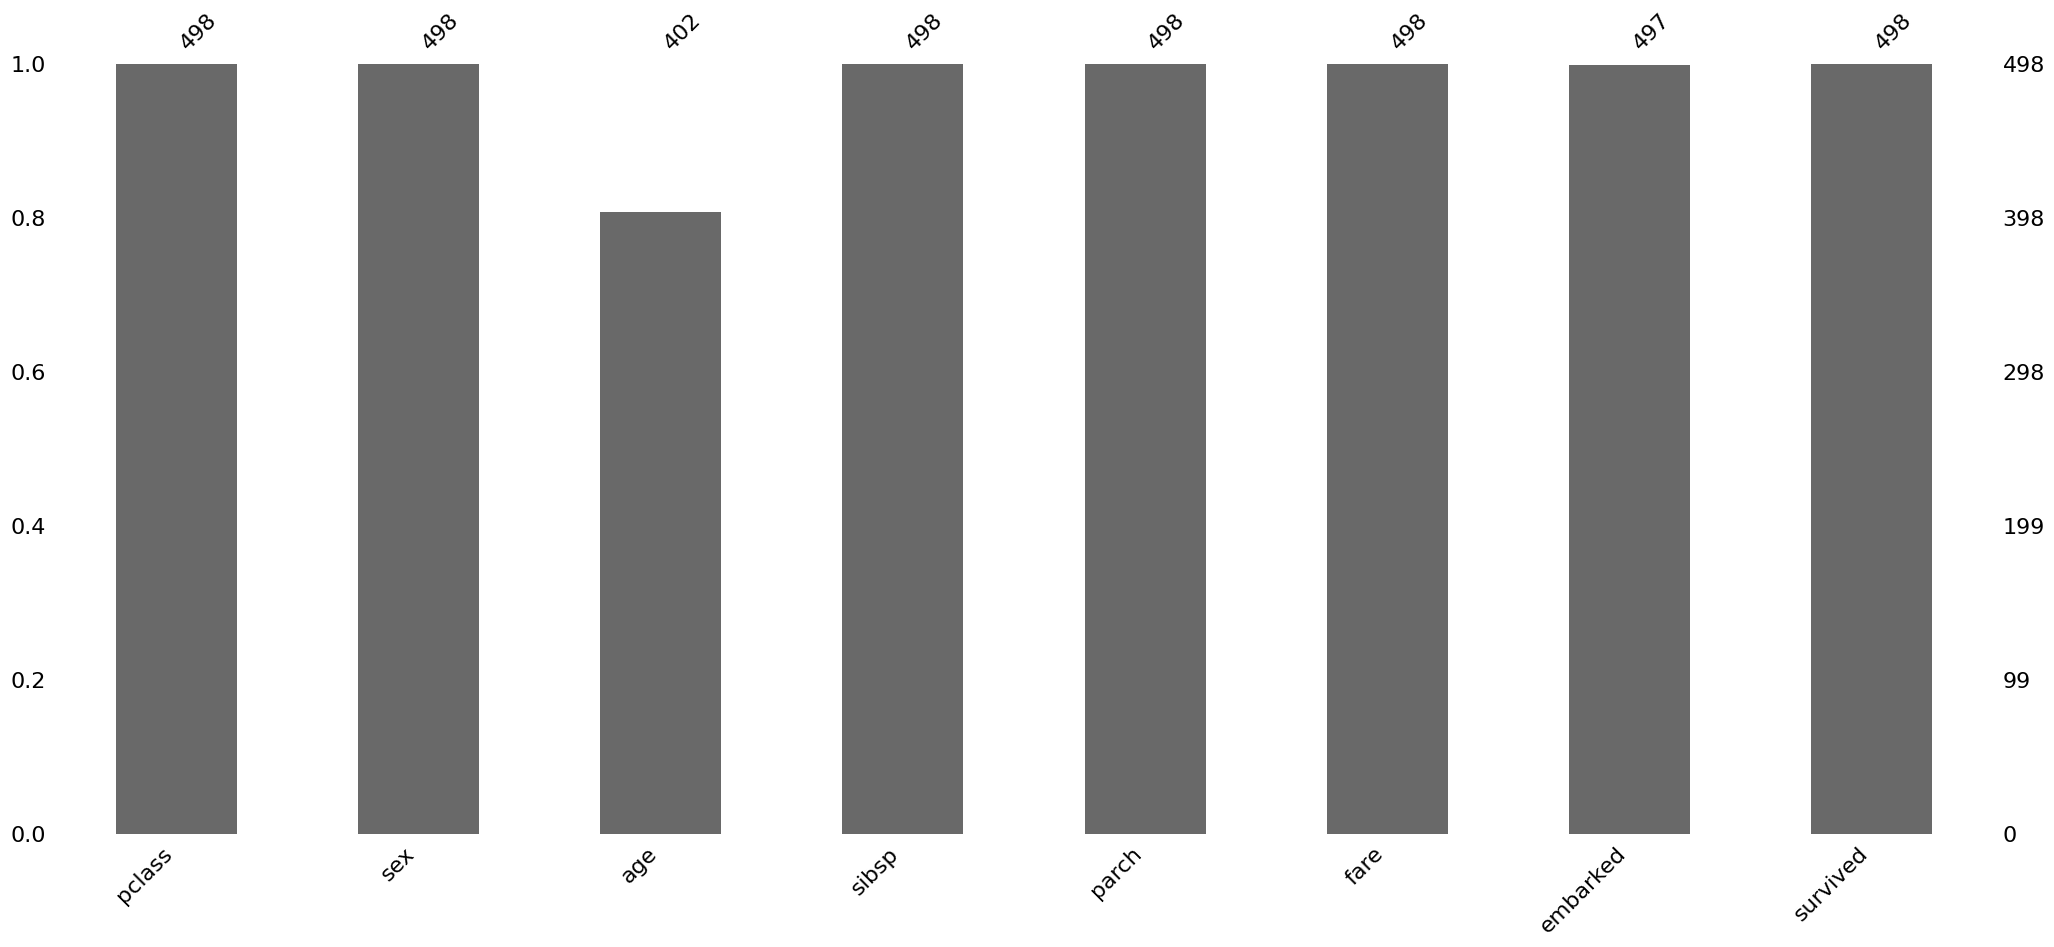

In [22]:
msno.bar(df)

<Axes: >

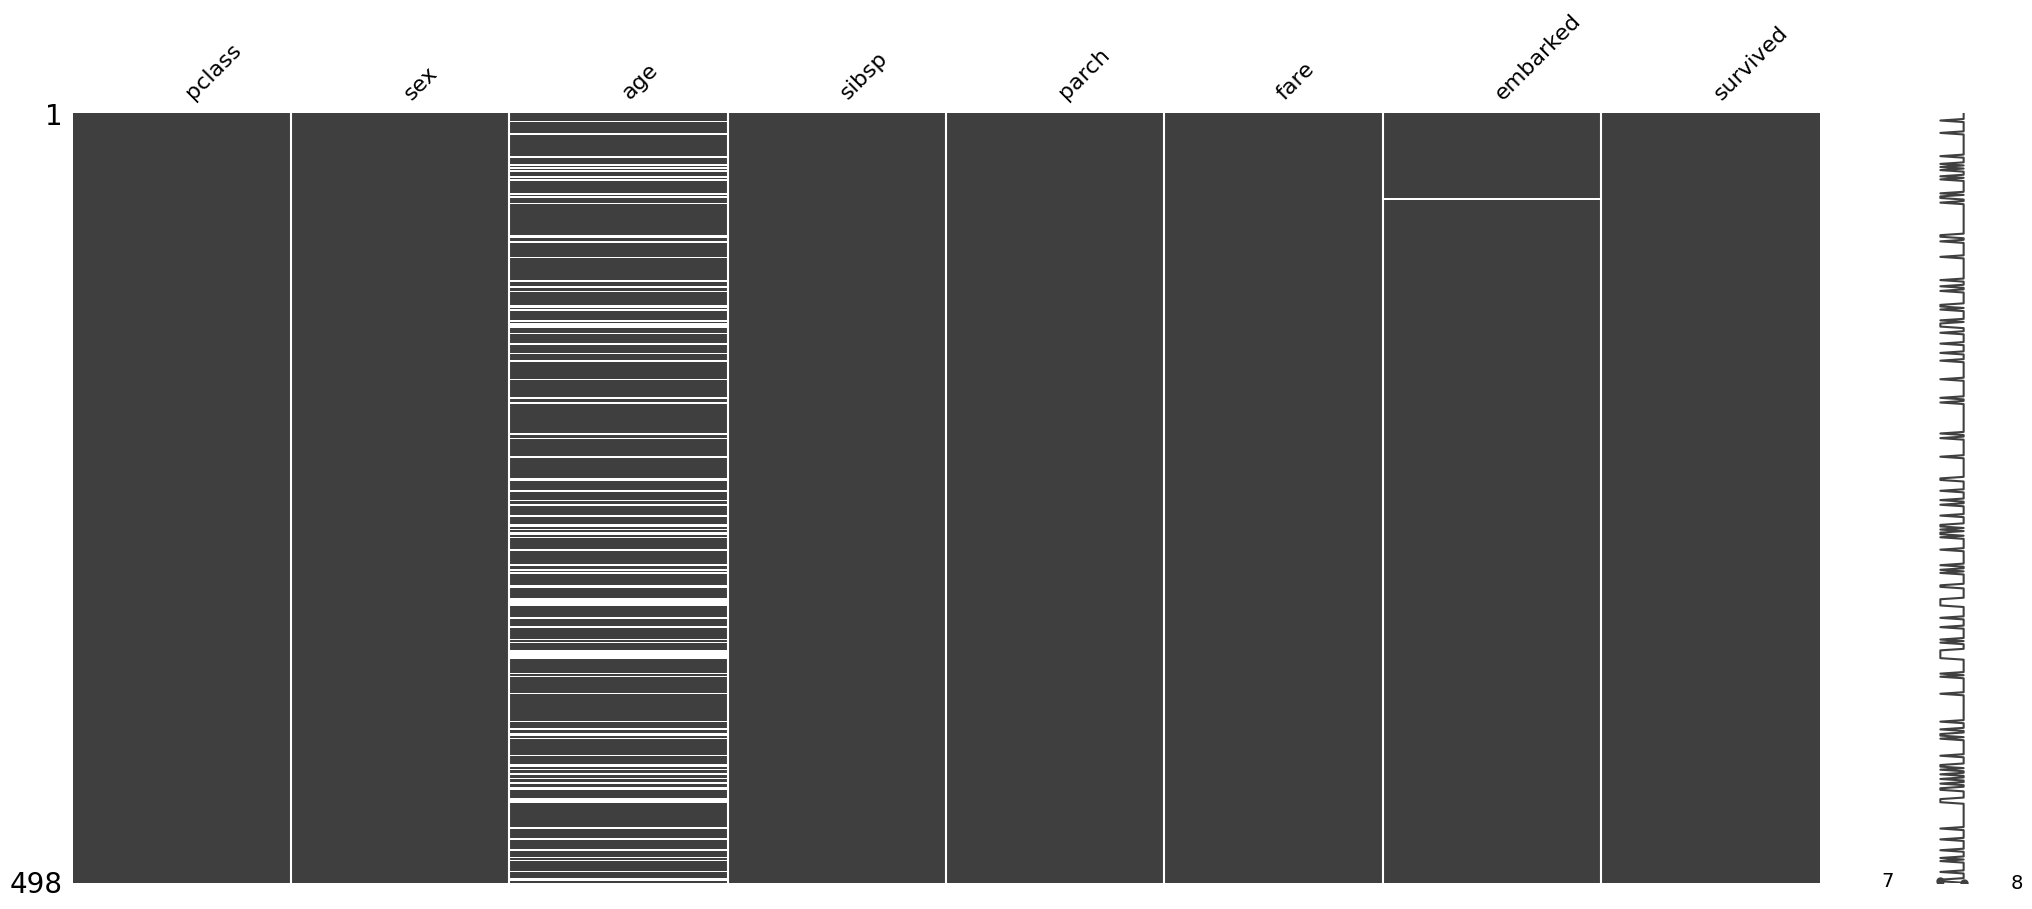

In [20]:
msno.matrix(df)

In [35]:
(
  df
  .assign(
    age_missing = lambda df_: df_.age.isnull().astype(int)
  )
  .groupby('pclass')
  .age_missing
  .mean()
)

pclass
1    0.109091
2    0.091743
3    0.265233
Name: age_missing, dtype: float64

3rd class passendgers have more missing values for `age` colm,
maybe coz they survived the least?  

In [36]:
(
  df
  .groupby('pclass')
  .survived
  .mean()
)

pclass
1    0.627273
2    0.449541
3    0.254480
Name: survived, dtype: float64

yes, they survived the least !! so cant say that missing values
of `age` colm depend on `pclass`

In [37]:
(
  df
  .assign(
    missing_age = lambda df_: df_.age.isnull().astype(int)
  )
  .groupby('sex')
  .missing_age
  .mean()
)

sex
female    0.169697
male      0.204204
Name: missing_age, dtype: float64

missing values of `age` dont depend on sex too
as both sex have similar missing values considering 
more male died than female 

In [41]:
(
  df
  .groupby('sex')
  .survived
  .mean()
)

sex
female    0.739394
male      0.201201
Name: survived, dtype: float64

In [ ]:
df.groupby('sex').

In [30]:
df.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked',
       'survived'],
      dtype='object')

### 4. High level analysis of outliers

In [12]:
df.columns

Index(['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked',
       'survived'],
      dtype='object')

In [14]:
df.dtypes

pclass        int64
sex          object
age         float64
sibsp         int64
parch         int64
fare        float64
embarked     object
survived      int64
dtype: object

for colms `age`, `sibsp`, `parch` nd `fare`  
it makes sense to check outliers      

In [ ]:
eda_helper_functions.

Here’s what you should focus on for EDA on Titanic (train set):

1. Structure & Quality Check
df.shape → Rows, columns count

df.info() → Data types, missing values count

df.describe() → Summary stats for numeric columns

2. Target Variable Analysis (Imbalance detection)
python
Copy
Edit
train['survived'].value_counts(normalize=True) * 100
Plot bar chart (0 = died, 1 = survived)

This is just to observe imbalance, don’t fix it yet.

3. Missing Value Analysis
Check percentage missing per column

Example for Titanic:

age often missing

embarked may have a few missing

Later, you’ll decide imputation strategies.

4. Univariate Analysis
Numeric features: histograms, boxplots for outliers (age, fare)

Categorical features: countplots (sex, pclass, embarked)

5. Bivariate Analysis with Target
Check relationships with survived:

Categorical vs target: pd.crosstab(train['sex'], train['survived']) → survival rate by sex

Numeric vs target: boxplots (e.g., age distribution for survived vs not)

6. Outlier Detection
Boxplots for fare and age

Z-score or IQR method to spot extreme points

7. Correlation
Heatmap for numeric columns to see multicollinearity

Special note: pclass is ordinal, but often treated as categorical.

💡 Key rule:
EDA = look, don’t touch (much)
You’re exploring patterns, not yet modifying data for training.
Balancing, scaling, encoding, and imputation come after EDA, in preprocessing.